# Importing Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

#importing surprise library
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader


C:\Users\H.HARISH\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Deliverable - 1

# Reading and Exploring Data 

Attribute Information:
* userId : Every user identified with a unique id

* productId : Every product identified with a unique id

* Rating : Rating of the corresponding product by the corresponding user

* timestamp : Time of the rating ( ignore this column for this exercise)

In [2]:
# Import the dataset and give the column names as per the question
columns=['userId', 'productId', 'ratings','timestamp']
data=pd.read_csv('ratings_Electronics.csv',names=columns)

In [3]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
# drop timestamp column
data.drop('timestamp', axis = 1, inplace = True)

In [5]:
print('The shape of the data is',data.shape)

#Check the number of rows and columns
rows,columns=data.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

The shape of the data is (7824482, 3)
Number of rows:  7824482
Number of columns:  3


# Handling Missing Values

In [6]:
print("Let us check for any Null values in the dataset:")
data.isnull().any()

Let us check for any Null values in the dataset:


userId       False
productId    False
ratings      False
dtype: bool

# Checking the data types

In [7]:
#Checking the data types
data.dtypes

userId        object
productId     object
ratings      float64
dtype: object

# Exploring data

In [8]:
# the below function helps in printing five point summary of a dataframe column
def five_point_summary(i):
    print("The 5 point summary of", i, "column would give the below results: ")
    print(data[i].describe().transpose())
    print(" "*50)
    if data[i].isnull().sum()==0:
        print("There are no null values in", i, "column")
# the below function helps in printing central values of a dataframe column
def central_values(i):
    print("Range of", i, "column:",data[i].max() - data[i].min())
    print("Mean of the elements in", i, "column", data[i].mean())
    print("Median of the elements in", i, "column", data[i].median())
    print("Standard Deviation of the elements in", i, "column", data[i].std())
# the below function helps in printing percentile values in the multiploes of 10 of a dataframe column
def percentiles(i):
    print("Percentile values:")
    for j in range(10, 101, 10):
        print(j,'percentile is',np.percentile(data[i], j))

# Users and Products column

In [9]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', data['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', data['productId'].nunique())

Number of unique users in Raw data =  4201696
Number of unique product in Raw data =  476002


# Ratings column

In [10]:
five_point_summary('ratings')

The 5 point summary of ratings column would give the below results: 
count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64
                                                  
There are no null values in ratings column


In [11]:
central_values('ratings')

Range of ratings column: 4.0
Mean of the elements in ratings column 4.012336791112817
Median of the elements in ratings column 5.0
Standard Deviation of the elements in ratings column 1.38090981858044


In [12]:
percentiles('ratings')

Percentile values:
10 percentile is 1.0
20 percentile is 3.0
30 percentile is 4.0
40 percentile is 4.0
50 percentile is 5.0
60 percentile is 5.0
70 percentile is 5.0
80 percentile is 5.0
90 percentile is 5.0
100 percentile is 5.0


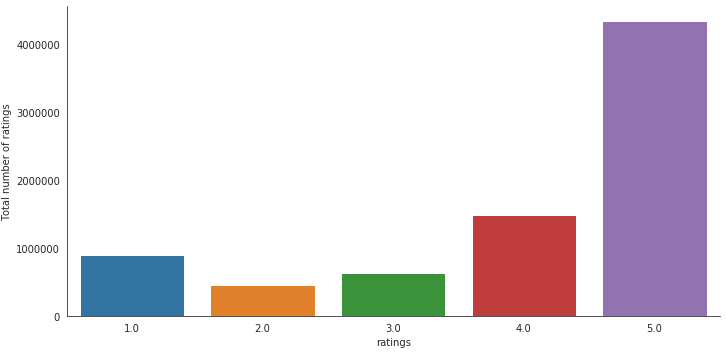

In [13]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [14]:
#Analysis of rating given by the user 
no_of_rated_products_per_user = data.groupby(by='userId')['ratings'].count().sort_values(ascending=False)
print(no_of_rated_products_per_user)

userId
A5JLAU2ARJ0BO            520
ADLVFFE4VBT8             501
A3OXHLG6DIBRW8           498
A6FIAB28IS79             431
A680RUE1FDO8B            406
                        ... 
A3AAXY0TMZS72Y             1
A3AAXX0N47FFP              1
A3AAXWHVCN6VOG             1
A3AAXWDYVQ93SZ             1
A00000262KYZUE4J55XGL      1
Name: ratings, Length: 4201696, dtype: int64


In [15]:
type(no_of_rated_products_per_user)

pandas.core.series.Series

# Individual count of Ratings

In [16]:
for i in range(1,6):
    print("Individual count of Ratings column with the rating: ", data[data['ratings']==i].ratings.value_counts())

Individual count of Ratings column with the rating:  1.0    901765
Name: ratings, dtype: int64
Individual count of Ratings column with the rating:  2.0    456322
Name: ratings, dtype: int64
Individual count of Ratings column with the rating:  3.0    633073
Name: ratings, dtype: int64
Individual count of Ratings column with the rating:  4.0    1485781
Name: ratings, dtype: int64
Individual count of Ratings column with the rating:  5.0    4347541
Name: ratings, dtype: int64


# Deliverable - 2

Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of 
ratings)

In [17]:
#Check the top 10 users based on ratings
most_rated=data.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64


Data model preparation as per requirement on number of minimum ratings

In [18]:
counts = data['userId'].value_counts()
data_final = data[data['userId'].isin(counts[counts >= 50].index)]
print('Number of users who have rated 50 or more items =', len(data_final))
print('Number of unique USERS in final data = ', data_final['userId'].nunique())
print('Number of unique ITEMS in final data = ', data_final['productId'].nunique())

Number of users who have rated 50 or more items = 125871
Number of unique USERS in final data =  1540
Number of unique ITEMS in final data =  48190


In [19]:
data_final.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


data_final has users who have rated 50 or more items

In [20]:
final_ratings_matrix = data_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))
final_ratings_matrix.head()

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Deliverable - 3

In [22]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train, test = train_test_split(data_final, test_size = 0.3, random_state=0)

In [23]:
print('Shape of training data: ',train.shape)
print('Shape of testing data: ',test.shape)

Shape of training data:  (88109, 3)
Shape of testing data:  (37762, 3)


# Deliverable - 4: Popularity Based Recommendation System

In [24]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [25]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head() 
popularity_recommendations 

,productId,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0


In [26]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

# Getting 5 recommendations

In [27]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

The list of recommendations for the userId: 10

       userID   productId  score  Rank
30847      10  B0088CJT4U    133   1.0
30287      10  B007WTAJTO    124   2.0
19647      10  B003ES5ZUU    122   3.0
8752       10  B000N99BBC    114   4.0
30555      10  B00829THK0     97   5.0


The list of recommendations for the userId: 100

       userID   productId  score  Rank
30847     100  B0088CJT4U    133   1.0
30287     100  B007WTAJTO    124   2.0
19647     100  B003ES5ZUU    122   3.0
8752      100  B000N99BBC    114   4.0
30555     100  B00829THK0     97   5.0


The list of recommendations for the userId: 150

       userID   productId  score  Rank
30847     150  B0088CJT4U    133   1.0
30287     150  B007WTAJTO    124   2.0
19647     150  B003ES5ZUU    122   3.0
8752      150  B000N99BBC    114   4.0
30555     150  B00829THK0     97   5.0




* Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

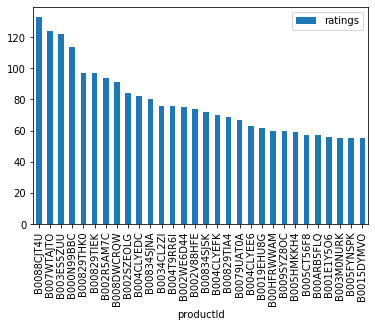

In [28]:
popular_products = pd.DataFrame(train.groupby('productId')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")

# Deliverable - 5, 6, 7:

# Collaborative filtering Model - Surprise Library

# Item - Item

In [29]:
from surprise.model_selection import train_test_split
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data_final,reader)
#Split the data randomnly into train and test datasets into 70:30 ratio
train, test = train_test_split(data, test_size = 0.3, random_state=0)
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train)
# run the trained model against the testset
test_pred = algo.test(test)
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Item-based Model : Test Set
RMSE: 1.1421


1.1420542400280187

In [30]:
# u can try thhis code if you have good amounts of ram --- Cross validation of Surprise library 
#from surprise.model_selection import cross_validate
#cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# User - User

In [31]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data_final,reader)
#Split the data randomnly into train and test datasets into 70:30 ratio
train, test = train_test_split(data, test_size = 0.3, random_state=0)
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(train)
# run the trained model against the testset
test_pre = algo.test(test)
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Item-based Model : Test Set


1.1420542400280187

In [32]:
# u can try thhis code if you have good amounts of ram
#from surprise.model_selection import cross_validate
#cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Collaborative Filtering - Manual

# User-User

In [33]:
# Import the dataset and give the column names as per the question
columns=['userId', 'productId', 'ratings','timestamp']
data_copy=pd.read_csv('ratings_Electronics.csv',names=columns)
data_copy.drop('timestamp', axis = 1, inplace = True)
data_copy = data_copy[data_copy['userId'].isin(counts[counts >= 50].index)]
#Split the data randomnly into train and test datasets into 70:30 ratio
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_copy, test_size = 0.3, random_state=0)

In [34]:
df_CF = pd.concat([train, test]).reset_index()
df_CF.head()

,index,userId,productId,ratings
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [35]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.shape
pivot_df.head()

(1540, 48190)

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [37]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD method

In [38]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [39]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))
#Enter 'userID' and 'num_recommendations' for the user #
userID = 11
num_recommendations = 20
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 11):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIEK                  0.0          2.657105
B00829THK0                  0.0          1.989265
B00829TIA4                  0.0          1.539519
B0034CL2ZI                  0.0          1.450480
B0079UAT0A                  0.0          1.378955
B00834SJSK                  0.0          1.354738
B00HFRWWAM                  0.0          1.347520
B00834SJNA                  0.0          1.320616
B004CLYEH8                  0.0          1.179269
B00BOHNYU6                  0.0          1.159181
B002SZEOLG                  0.0          1.138003
B00BOHNYTW                  0.0          1.067894
B00AQRUW4Q                  0.0          1.065242
B003ES5ZUU                  0.0          1.032753
B009NHWVIA                  0.0          1.010744
B0097CXWUW                  0.0          0.923688
B0081FLFQE                  0.0          0

In [40]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4



RMSE SVD Model = 0.0033 



# Item-Item

In [41]:
# Import the dataset and give the column names as per the question
columns=['userId', 'productId', 'ratings','timestamp']
data_cop=pd.read_csv('ratings_Electronics.csv',names=columns)
data_cop.drop('timestamp', axis = 1, inplace = True)
data_cop = data_cop[data_cop['userId'].isin(counts[counts >= 50].index)]
#Split the data randomnly into train and test datasets into 70:30 ratio
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_cop, test_size = 0.3, random_state=0)
df_C = pd.concat([train, test]).reset_index()
df_C.head()

,index,userId,productId,ratings
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [42]:
#Item-based Collaborative Filtering
# Matrix with row per 'product' and column per 'user' 
pivot_d = df_C.pivot(index = 'productId', columns ='userId', values = 'ratings').fillna(0)
pivot_d.shape
pivot_d.head()

(48190, 1540)

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
pivot_d['prod_index'] = np.arange(0, pivot_d.shape[0], 1)
pivot_d.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ,prod_index
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [44]:
pivot_d.set_index(['prod_index'], inplace=True)

# Actual ratings given by users
pivot_d.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
prod_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD method

In [45]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_d, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [46]:
all_product_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_d = pd.DataFrame(all_product_predicted_ratings, columns = pivot_d.columns)
preds_d.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
0,0.002661,0.002262,-0.001600,0.002732,0.000704,-0.000930,0.003621,0.009284,0.002644,0.005900,...,0.002661,0.001231,0.000671,0.006025,0.003665,0.002267,0.001634,0.004382,0.000809,0.001751
1,0.003576,0.002505,-0.002502,0.003867,0.000085,-0.001306,0.006002,0.015531,0.003788,0.007928,...,0.003782,0.001014,-0.000979,0.009998,0.005062,0.003556,0.002907,0.004596,0.001380,0.001743
2,0.004050,0.005136,0.002186,0.001799,0.002051,0.003299,0.002036,0.003598,0.002334,0.002034,...,0.001326,0.001519,0.004442,0.002765,0.007673,0.001768,0.001292,0.011334,0.002546,0.000482
3,0.006906,0.016517,0.016742,0.009395,0.009664,0.009274,0.020001,0.045965,0.040040,0.027708,...,0.010304,0.005225,-0.008384,0.032213,0.017030,0.011896,0.008842,-0.018158,0.005918,0.005568
4,0.003967,0.007120,0.006716,0.004075,0.004438,0.005772,0.005581,0.013889,0.011942,0.008247,...,0.003865,0.002371,0.002050,0.010065,0.011424,0.003825,0.002579,-0.009939,0.003205,0.002040


In [47]:
# Recommend the items with the highest predicted ratings

def recommend_items(prodID, pivot_d, preds_d, num_recommendations):
      
    prod_idx = prodID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_prod_ratings = pivot_d.iloc[prod_idx].sort_values(ascending=False)
    #sorted_prod_ratings
    sorted_prod_predictions = preds_d.iloc[prod_idx].sort_values(ascending=False)
    #sorted_prod_predictions

    temp = pd.concat([sorted_prod_ratings, sorted_prod_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['prod_ratings', 'prod_predictions']
    
    temp = temp.loc[temp.prod_ratings == 0]   
    temp = temp.sort_values('prod_predictions', ascending=False)
    print('\nBelow are the similar recommended items for product(prod_id = {}):\n'.format(prodID))
    print(temp.head(num_recommendations))
#Enter 'userID' and 'num_recommendations' for the user #
userID = 25
num_recommendations = 10
recommend_items(userID, pivot_d, preds_d, num_recommendations)


Below are the similar recommended items for product(prod_id = 25):

                   prod_ratings  prod_predictions
Recommended Items                                
AZMY6E8B52L2T               0.0          0.203106
A2UOHALGF2X77Q              0.0          0.146679
A1E1LEVQ9VQNK               0.0          0.127123
A36K2N527TXXJN              0.0          0.115331
A3V5F050GVZ56Q              0.0          0.115318
A17V9XL4CWTQ6G              0.0          0.111698
A17BUUBOU0598B              0.0          0.104383
A250AXLRBVYKB4              0.0          0.097655
A38RMU1Y5TDP9               0.0          0.095568
A12DQZKRKTNF5E              0.0          0.093611


In [48]:
rmse_d = pd.concat([final_ratings_matrix_T.mean(), preds_d.mean()], axis=1)
rmse_d.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_d.shape)
rmse_d['item_index'] = np.arange(0, rmse_d.shape[0], 1)
rmse_d.head()
RMSE = round((((rmse_d.Avg_actual_ratings - rmse_d.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

(1540, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
userId,,,
A100UD67AHFODS,0.010853,0.009039,0
A100WO06OQR8BQ,0.010002,0.011112,1
A105S56ODHGJEK,0.005416,0.006118,2
A105TOJ6LTVMBG,0.005665,0.004515,3
A10AFVU66A79Y1,0.005644,0.005214,4



RMSE SVD Model = 0.0028 



# Deliverable - 8 : Conclusions

Popularity Recommendation Systems:
* Here, all the products which are recommended to any user is same because it is done based on the highest number of ratings

Collaborative Filtering:
* If we have users who have given more ratings than 100 or 150, we would have very dense data than with 50 users
* Since the data with surprise is sparse, we got bad rmse values
* Svd models which we have computed manually have better RMSE values than surprise library's knnmeans